In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [49]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [50]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [69]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10, 0:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 10)


In [52]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_norm, datay_onehot, test_size= 0.25, random_state = 42)

In [53]:
print(trnx.shape)
print(trny.shape)

(45000, 28, 28)
(45000, 10)


In [54]:
input_shape = (28,28,1)

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32,(2,2), padding='same', input_shape = input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(64,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units=256, activation="relu"))
cnn_model.add(layers.Dense(units=10, activation="softmax"))

cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [55]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_12 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
activation_13 (Activation)   (None, 14, 14, 64)       

In [56]:
idx1= np.where(datay == 4)
idx2= np.where(datay == 2)
idx12= np.union1d(idx1,idx2)

In [57]:
datax_train = datax_norm[idx12, :]
datay_train = datay[idx12]
datay_train_onehot = to_categorical(datay_train)
print(datax_train.shape)
print(datay_train_onehot.shape)

(11800, 28, 28)
(11800, 5)


In [58]:
from sklearn.model_selection import train_test_split
trnx2, tstx2, trny2, tsty2 = train_test_split(datax_train, datay_train_onehot, test_size= 0.35, random_state = 42)

In [70]:
input_shape = (28,28,1)

cnn_model2 = models.Sequential()

cnn_model2.add(layers.Conv2D(8,(2,2), padding='same', input_shape = input_shape))
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.Activation("relu"))
cnn_model2.add(layers.MaxPooling2D((2,2)))

cnn_model2.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model2.add(layers.BatchNormalization())
cnn_model2.add(layers.Activation("relu"))
cnn_model2.add(layers.Dropout(0.2))
cnn_model2.add(layers.MaxPooling2D((2,2)))

cnn_model2.add(layers.Flatten())

cnn_model2.add(layers.Dense(units=64, activation="relu"))
cnn_model2.add(layers.Dense(units=5, activation="softmax"))

cnn_model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [60]:
cnn_model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 8)         40        
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 8)         32        
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 16)        528       
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 14, 14, 16)       

In [61]:
trnx_reshape = trnx.reshape(-1, 28, 28, 1)
tstx_reshape = tstx.reshape(-1, 28, 28, 1)
trnx_reshape.shape

(45000, 28, 28, 1)

In [71]:
trnx2_reshape = trnx2.reshape(-1, 28, 28, 1)
tstx2_reshape = tstx2.reshape(-1, 28, 28, 1)
trnx2_reshape.shape

(7670, 28, 28, 1)

In [63]:
history = cnn_model.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size = 20, epochs=10)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 53s 1ms/sample - loss: 0.1611 - accuracy: 0.9529 - val_loss: 0.0740 - val_accuracy: 0.9788
Epoch 2/10
45000/45000 [==============================] - 53s 1ms/sample - loss: 0.0651 - accuracy: 0.9791 - val_loss: 0.0623 - val_accuracy: 0.9798
Epoch 3/10
45000/45000 [==============================] - 54s 1ms/sample - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.0758 - val_accuracy: 0.9768
Epoch 4/10
45000/45000 [==============================] - 56s 1ms/sample - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0523 - val_accuracy: 0.9849
Epoch 5/10
45000/45000 [==============================] - 54s 1ms/sample - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0780 - val_accuracy: 0.9747
Epoch 6/10
45000/45000 [==============================] - 59s 1ms/sample - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0525 - val_accuracy: 0.9857
Epoch 7/10
45000/45000 [==============================] 

In [72]:
history2 = cnn_model2.fit(trnx2_reshape, trny2, validation_data = [tstx2_reshape, tsty2], batch_size = 20, epochs=30)

Train on 7670 samples, validate on 4130 samples
Epoch 1/30
7670/7670 [==============================] - 5s 608us/sample - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.0350 - val_accuracy: 0.9930
Epoch 2/30
7670/7670 [==============================] - 4s 528us/sample - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.0124 - val_accuracy: 0.9971
Epoch 3/30
7670/7670 [==============================] - 4s 485us/sample - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.0147 - val_accuracy: 0.9956
Epoch 4/30
7670/7670 [==============================] - 4s 500us/sample - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0333 - val_accuracy: 0.9872
Epoch 5/30
7670/7670 [==============================] - 4s 492us/sample - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0129 - val_accuracy: 0.9966
Epoch 6/30
7670/7670 [==============================] - 4s 481us/sample - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.0105 - val_accuracy: 0.9981
Epoch 7/30
7670/7670 [==============================] - 4s 490us

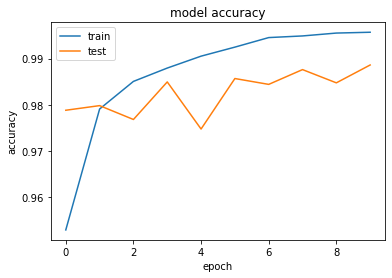

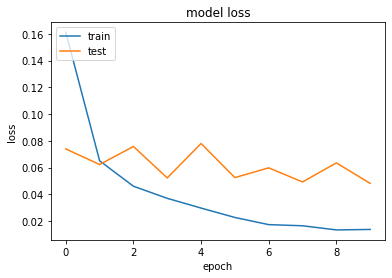

0.9886
0.9886


In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))

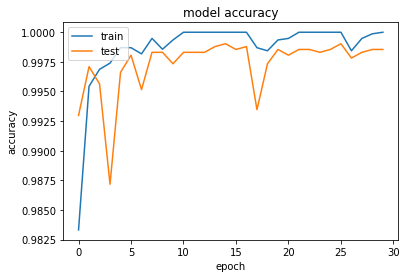

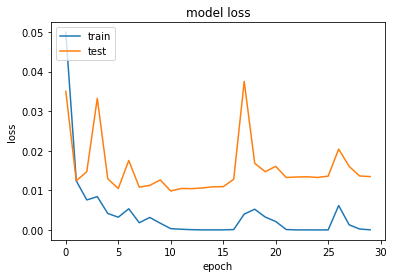

0.9985472
0.9990315


In [74]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history2.history['val_accuracy'][-1])
print(np.max(history2.history['val_accuracy']))